In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
dataframeX = pd.read_csv('data/smallset.csv',usecols=[5,6,7,8])
dataframeY = pd.read_csv('data/smallsetY.csv',usecols=[8])
#print(dataframeX.index.values)
print(dataframeX)
X = dataframeX.as_matrix()
Y = dataframeY.as_matrix()


       open    high     low   close
0    135.30  135.98  132.10  134.21
1    134.44  147.49  134.00  144.54
2    144.00  146.93  134.05  139.00
3    139.00  139.89  107.72  116.99
4    116.38  125.60   92.28  105.21
5    106.25  108.13   79.10   97.75
6     98.10  115.00   92.50  112.50
7    112.90  118.80  107.14  115.91
8    115.98  124.66  106.64  112.30
9    112.25  113.44   97.70  111.50
10   109.60  115.78  109.60  113.57
11   113.20  113.46  109.26  112.67
12   112.80  122.00  111.55  117.20
13   117.70  118.68  113.01  115.24
14   115.64  117.45  113.44  115.00
15   114.82  118.70  114.50  117.98
16   117.98  119.80  110.25  111.50
17   111.40  115.81  103.50  114.22
18   114.22  118.76  112.20  118.76
19   118.21  125.30  116.57  123.02
20   123.50  125.25  122.30  123.50
21   123.21  124.50  119.57  121.99
22   122.50  123.62  120.12  122.00
23   122.02  123.00  121.21  122.88
24   122.89  124.00  122.00  123.89
25   123.80  126.93  123.10  126.70
26   126.30  133.85  125.72 

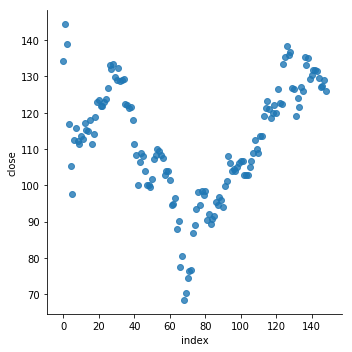

In [10]:
sns.lmplot('index','close', data=dataframeX.reset_index(),fit_reg=False)
plt.show()

In [19]:
model = Sequential()
model.add(Dense(1,input_shape=(4,)))
model.add(Activation('relu'))

sgd = SGD(0.02)

model.compile(loss='mse',optimizer=sgd,
             metrics=['mse'])

H = model.fit(X,Y,nb_epoch=3)

/usr/local/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
149/149 [==============================] - 0s 2ms/step - loss: 12866.5677 - mean_squared_error: 12866.5677
Epoch 2/3
149/149 [==============================] - 0s 101us/step - loss: 12866.5679 - mean_squared_error: 12866.5679
Epoch 3/3
149/149 [==============================] - 0s 277us/step - loss: 12866.5679 - mean_squared_error: 12866.5679


In [17]:
XVal = pd.read_csv('data/trainsetX.csv',usecols=[5,6,7,8]).as_matrix()
model.predict(XVal)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)